In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split


data = pd.read_excel(r"C:\Users\Damilola Ologunagba\Desktop\MLDATA\FCCdata.xlsx")
encode = LabelEncoder()
data.System = encode.fit_transform(data.System)
train , test = train_test_split(data,test_size=0.2,random_state=8)

train_x = train.drop(columns=['Surface Segregation energy', 'System'],axis=1)
train_y = train['Surface Segregation energy']
test_x  = test.drop(columns=['Surface Segregation energy', 'System'],axis=1)
test_y  = test['Surface Segregation energy']

est = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=9).fit(train_x, train_y)
prediction = est.predict(test_x)
prediction1 = est.predict(train_x)

In [25]:
from sklearn.metrics import r2_score
r2_score(train_y, prediction1)

0.9959318129383593

In [26]:
# print result of RMSE for the test set
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(test_y, prediction)))

0.1441390804753884


In [27]:
from sklearn.metrics import r2_score
r2_score(test_y, prediction)

0.8820772600400767

In [20]:
# print result of RMSE for the train set
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(train_y, prediction1)))

0.02950919019485425


In [21]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_y, prediction)

0.11246473909205872

In [22]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(train_y, prediction1)

0.0220461546066933

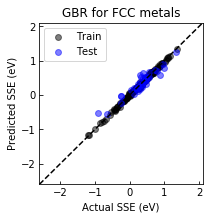

In [23]:
lineStart = test_y.min() 
lineEnd = prediction.max()  

plt.figure(figsize=(3,3))
plt.scatter(train_y, prediction1,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train')
plt.scatter(test_y,prediction,
          c = 'blue', marker = 'o', s = 35, alpha = 0.5,
          label = 'Test')

plt.title('GBR for FCC metals')
plt.tight_layout()
axes = plt.gca()
axes.set_xlim([-2.6,2.1])
axes.set_ylim([-2.6,2.1])

diag_line, = axes.plot(axes.get_xlim(), axes.get_ylim(), ls="--", c="black")
axes.tick_params(axis="y",direction="in")
axes.tick_params(axis="x",direction="in")

plt.xlabel('Actual SSE (eV)')
plt.ylabel('Predicted SSE (eV)')

plt.legend(loc='upper left')

plt.savefig('GBR for FCC metals.png', dpi=2000)

from PIL import Image, ImageEnhance 
im = Image.open("GBR for FCC metals.png")
enhancer = ImageEnhance.Sharpness(im)
enhanced_im = enhancer.enhance(20000.0)
enhanced_im.save("GBR for FCC metals enhanced.png")


In [112]:
pd.set_option("max_rows", None)
df = pd.DataFrame({'Actual Surface Segregation Energy': test_y, 'Predicted Surface Segregation Energy': prediction})
df

,Actual Surface Segregation Energy,Predicted Surface Segregation Energy
171,0.31,0.188844
23,0.46,0.509648
99,0.04,0.152761
134,0.56,0.518160
1,0.98,0.810100
90,0.34,0.322913
101,0.87,0.583348
158,0.23,0.309800
163,0.25,0.104431
52,0.12,0.035469


[2.42896945e-03 8.20775464e-02 1.05035767e-01 9.03562158e-04
 6.78519631e-03 1.43205840e-01 1.80859221e-02 2.58413757e-02
 2.19762177e-03 5.34071017e-05 6.48244572e-03 6.80956669e-02
 5.28701804e-02 5.41297701e-03 3.62620978e-02 7.46745903e-02
 2.01018427e-01 1.32832183e-01 3.45703470e-02 1.16587777e-03]


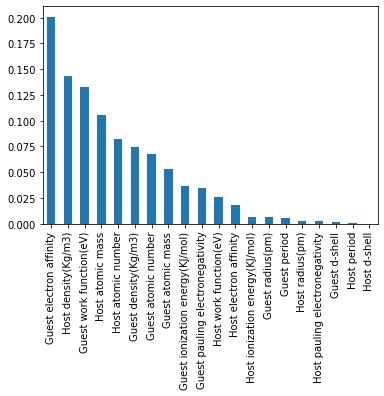

In [113]:
import pandas as pd
import numpy as np
import seaborn as sns

print(est.feature_importances_) #use inbuilt class feature_importances s
#plot graph of feature importances for better visualization
feat_importances = pd.Series(est.feature_importances_, index=train_x.columns)
feat_importances.nlargest(22).plot(kind='bar')
plt.show()

[2.42896945e-03 8.20775464e-02 1.05035767e-01 9.03562158e-04
 6.78519631e-03 1.43205840e-01 1.80859221e-02 2.58413757e-02
 2.19762177e-03 5.34071017e-05 6.48244572e-03 6.80956669e-02
 5.28701804e-02 5.41297701e-03 3.62620978e-02 7.46745903e-02
 2.01018427e-01 1.32832183e-01 3.45703470e-02 1.16587777e-03]


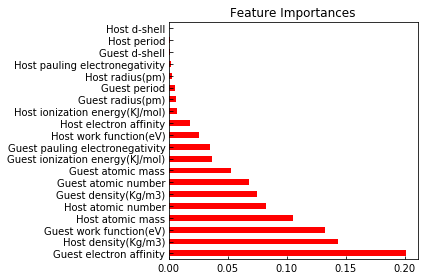

C:\Users\Damilola Ologunagba\Anaconda3\lib\site-packages\PIL\Image.py:2735: DecompressionBombWarning: Image size (96000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


In [114]:
import pandas as pd
import numpy as np
import seaborn as sns

print(est.feature_importances_)
feat_importances = pd.Series(est.feature_importances_, index=train_x.columns)
feat_importances.nlargest(22).plot(kind='barh', color ="red", align="center", alpha = 1)


axes = plt.gca()
axes.tick_params(axis="y",direction="in")
axes.tick_params(axis="x",direction="in")
plt.title("Feature Importances")
plt.tight_layout()
plt.savefig('FCC metals feature importance.png', dpi=2000)
plt.show()

from PIL import Image, ImageEnhance 
im = Image.open("FCC metals feature importance.png")
enhancer = ImageEnhance.Sharpness(im)
enhanced_im = enhancer.enhance(20000.0)
enhanced_im.save("FCC metals feature importance enhanced.png")


In [106]:
# print result of RMSE for the train set
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(train_y, prediction1)))

0.12267749304978678


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split


data = pd.read_excel(r"C:\Users\Damilola Ologunagba\Desktop\MLDATA\FCCdata.xlsx")
encode = LabelEncoder()
data.System = encode.fit_transform(data.System)
train , test = train_test_split(data,test_size=0.2,random_state=6)

train_x = train.drop(columns=['Surface Segregation energy', 'System', 'period', 'enthalpy of fusion/ KJ/mol', 'enthalpy of fusion/KJ/mol', 'd-shell.1', 'd-shell', 'Radius/pm', 'period.1', 'Pauling electronegativity', 'ionization energy/ KJ/mol', 'work function/eV', 'Pauling electronegativity.1', 'Atomic no.1', 'electron affinity.1', 'ionization energy/ KJ/mol', 'Atomic no.1', 'density/Kg/m3','Atomic mass.1','electron affinity'],axis=1)
train_y = train['Surface Segregation energy']
test_x = test.drop(columns=['Surface Segregation energy', 'System', 'period', 'enthalpy of fusion/ KJ/mol', 'enthalpy of fusion/KJ/mol', 'd-shell.1', 'd-shell', 'Radius/pm', 'period.1', 'Pauling electronegativity', 'ionization energy/ KJ/mol', 'work function/eV', 'Pauling electronegativity.1', 'Atomic no.1', 'electron affinity.1', 'ionization energy/ KJ/mol', 'Atomic no.1', 'density/Kg/m3','Atomic mass.1','electron affinity'],axis=1)
test_y = test['Surface Segregation energy']

est = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=9, loss='ls').fit(train_x, train_y)
prediction = est.predict(test_x)
prediction1 = est.predict(train_x)

In [15]:
# print result of RMSE for the test set
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(test_y, prediction)))

0.23124545548439943


In [4]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_y, prediction)

0.11488173520327212

In [3]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(train_y, prediction1)

0.04066501092538981

In [29]:
data = pd.read_excel(r"C:\Users\Damilola Ologunagba\Desktop\MLDATA\FCCdata.xlsx")
data['System']

0       PtTi
1        PtV
2       PtCr
3       PtMn
4       PtFe
5       PtCo
6       PtNi
7       PtCu
8      PtZr 
9       PtNb
10      PtMo
11      PtTc
12      PtRu
13      PtRh
14      PtPd
15      PtAg
16      PtHf
17      PtTa
18       PtW
19      PtRe
20      PtOs
21      PtIr
22      PtPt
23      PtAu
24      AuTi
25       AuV
26      AuCr
27      AuMn
28      AuFe
29      AuCo
       ...  
162      CuW
163     CuRe
164     CuOs
165     CuIr
166     CuPt
167     CuAu
168     NiTi
169      NiV
170     NiCr
171     NiMn
172     NiFe
173     NiCo
174     NiNi
175     NiCu
176     NiZr
177     NiNb
178     NiMo
179     NiTc
180     NiRu
181     NiRh
182     NiPd
183     NiAg
184     NiHf
185     NiTa
186      NiW
187     NiRe
188     NiOs
189     NiIr
190     NiPt
191     NiAu
Name: System, Length: 192, dtype: object